In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df = pd.read_csv('athlete_events.csv')

In [99]:
df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


1. Data Cleaning:

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [101]:
df.isnull()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True
3,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
271112,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
271113,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
271114,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [102]:
df_cleaned = df.dropna()

In [103]:
# Fill missing 'Age' with mean
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Fill missing 'Medal' with 'None'
df['Medal'].fillna('None', inplace=True)

# Drop rows with missing values in essential columns
df.dropna(subset=['Name', 'Sex', 'Team'], inplace=True)



/tmp/ipython-input-103-1721128136.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-103-1721128136.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [104]:
df_cleaned = df.dropna(axis=1)

In [105]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None


In [106]:
df.drop_duplicates(inplace=True)

In [107]:
display(df_cleaned.dtypes)

,0
ID,int64
Name,object
Sex,object
Age,float64
Team,object
NOC,object
Games,object
Year,int64
Season,object
City,object


In [108]:
# Convert Age to numeric (already handled)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Convert Year to integer if not already
df['Year'] = df['Year'].astype(int)

# Convert 'Sex' and 'Medal' to Unknown
df['Sex'] = df['Sex'].astype('category')
df['Medal'] = df['Medal'].astype('category')



In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269731 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   ID      269731 non-null  int64   
 1   Name    269731 non-null  object  
 2   Sex     269731 non-null  category
 3   Age     269731 non-null  float64 
 4   Height  210917 non-null  float64 
 5   Weight  208204 non-null  float64 
 6   Team    269731 non-null  object  
 7   NOC     269731 non-null  object  
 8   Games   269731 non-null  object  
 9   Year    269731 non-null  int64   
 10  Season  269731 non-null  object  
 11  City    269731 non-null  object  
 12  Sport   269731 non-null  object  
 13  Event   269731 non-null  object  
 14  Medal   269731 non-null  category
dtypes: category(2), float64(3), int64(2), object(8)
memory usage: 29.3+ MB


In [110]:
df.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,0
Height,58814
Weight,61527
Team,0
NOC,0
Games,0
Year,0


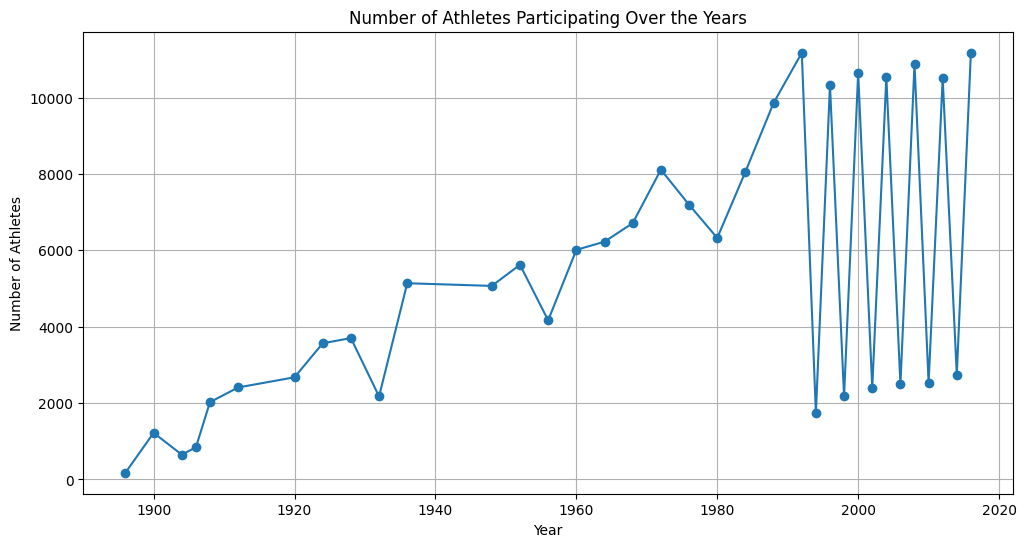

In [111]:
athlete_participation = df[['Name', 'Year']].drop_duplicates()
athletes_per_year = athlete_participation.groupby('Year').count()


plt.figure(figsize=(12,6))
plt.plot(athletes_per_year.index, athletes_per_year['Name'], marker='o')
plt.title("Number of Athletes Participating Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Athletes")
plt.grid(True)
plt.show()


/tmp/ipython-input-112-1046981423.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="muted")


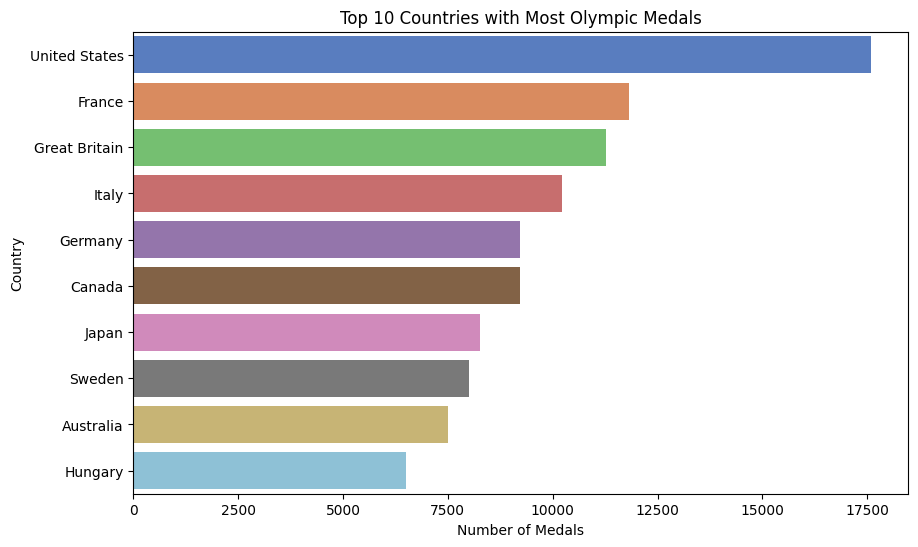

In [112]:
top_countries = df['Team'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="muted")
plt.title("Top 10 Countries with Most Olympic Medals")
plt.xlabel("Number of Medals")
plt.ylabel("Country")
plt.show()


/tmp/ipython-input-117-3229082017.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sports_medal.values, y=sports_medal.index, palette="muted")


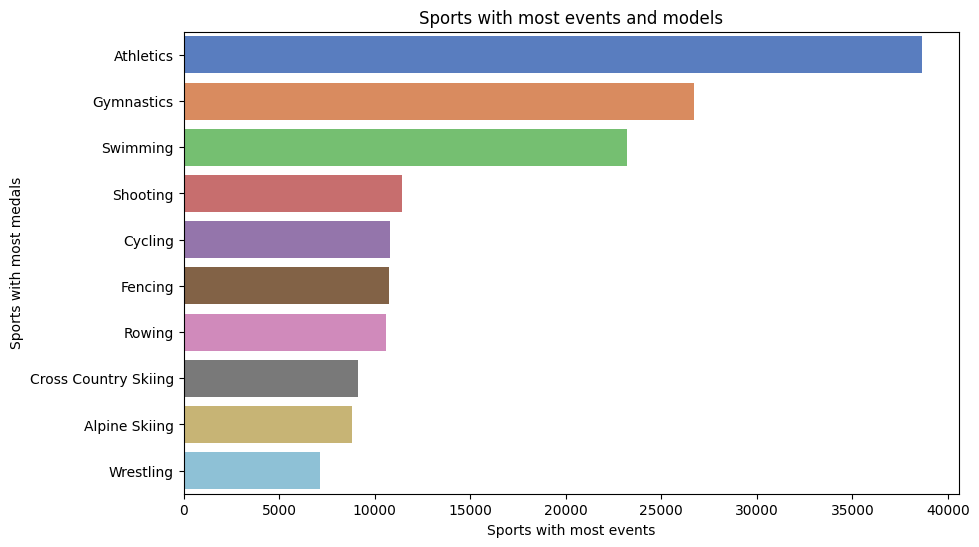

In [117]:
sports_medal = df['Sport'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=sports_medal.values, y=sports_medal.index, palette="muted")
plt.title("Sports with most events and models")
plt.xlabel("Sports with most events")
plt.ylabel("Sports with most medals")
plt.show()


3. Statistical Insights with NumPy:

In [118]:

ages = df['Age'].dropna()
average_age = np.mean(ages)


min_age = np.min(ages)
max_age = np.max(ages)
age_range = max_age - min_age

print(f"Average Age of Athletes: {average_age:.2f} years")
print(f"Minimum Age: {min_age}")
print(f"Maximum Age: {max_age}")
print(f"Age Range: {age_range}")


Average Age of Athletes: 25.46 years
Minimum Age: 10.0
Maximum Age: 97.0
Age Range: 87.0


In [121]:
unique_sports = df['Sport'].nunique()
unique_events = df['Event'].nunique()
unique_teams = df['Team'].nunique()

print(f"Number of Unique Sports: {unique_sports}")
print(f"Number of Unique Events: {unique_events}")
print(f"Number of Unique Countries (Teams): {unique_teams}")


Number of Unique Sports: 66
Number of Unique Events: 765
Number of Unique Countries (Teams): 1184


4. Pandas Analysis:

In [131]:
group_medal_by_country=df.groupby('Team')['Medal'].count().sort_values(ascending=False).head(10)
group_medal_by_country


,Medal
Team,
United States,17598
France,11817
Great Britain,11264
Italy,10213
Germany,9230
Canada,9226
Japan,8269
Sweden,8004
Australia,7512


In [132]:
group_medal_by_sports=df.groupby('Sport')['Medal'].count().sort_values(ascending=False).head(10)
group_medal_by_sports

,Medal
Sport,
Athletics,38624
Gymnastics,26707
Swimming,23195
Shooting,11448
Cycling,10827
Fencing,10735
Rowing,10595
Cross Country Skiing,9133
Alpine Skiing,8829


In [133]:
group_medal_by_year=df.groupby('Year')['Medal'].count().sort_values(ascending=False).head(10)
group_medal_by_year

,Medal
Year,
1992,16413
1988,14676
2000,13821
1996,13780
2016,13688
2008,13602
2004,13443
2012,12920
1972,11959


In [134]:
athlete_with_most_medals=df.groupby('Name')['Medal'].count().sort_values(ascending=False).head(10)
athlete_with_most_medals

,Medal
Name,
Heikki Ilmari Savolainen,39
"Joseph ""Josy"" Stoffel",38
Ioannis Theofilakis,36
Takashi Ono,33
Andreas Wecker,32
Alexandros Theofilakis,32
"Alfred August ""Al"" Jochim",31
"Johann ""Hans"" Sauter",31
Michel Mathiot,31


/tmp/ipython-input-139-1835240625.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_count = df.groupby(['Year', 'Sex'])['Name'].count().unstack()


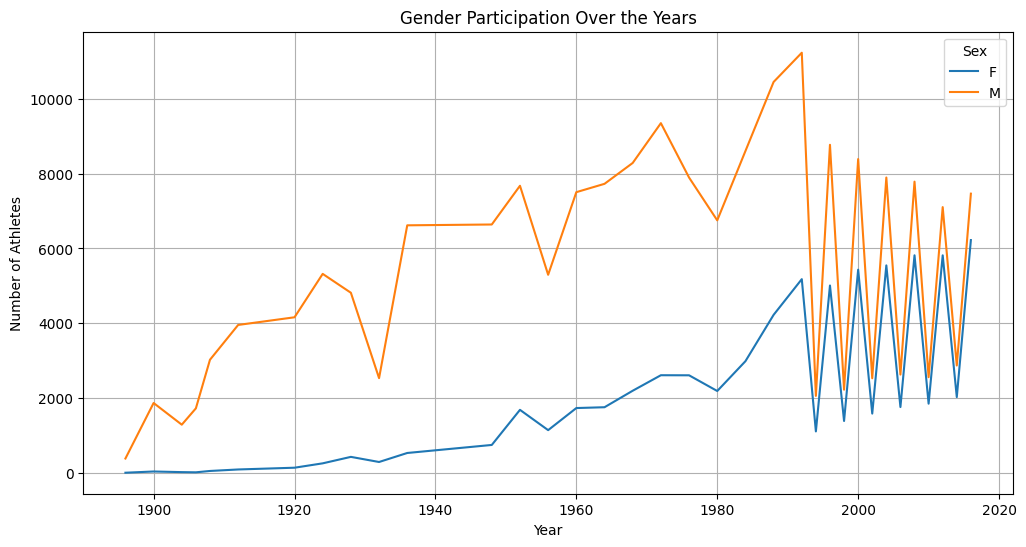

In [139]:
gender_count = df.groupby(['Year', 'Sex'])['Name'].count().unstack()


gender_count.plot(kind='line', figsize=(12,6))
plt.title("Gender Participation Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Athletes")
plt.grid(True)
plt.legend(title='Sex')
plt.show()
